In [20]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
import seaborn as sns
import networkx as nx

In [21]:
with open('df_text.pickle', 'rb') as handle:
    df_text = pickle.load(handle)
    
with open('df_meta.pickle', 'rb') as handle:
    df_meta = pickle.load(handle)

with open('GCC.pickle', 'rb') as handle:
    G = pickle.load(handle)

In [22]:
df_text

,Name,Race,Affiliation,Clean Text,Out Links
0,Terokk,Arakkoa,Other,Terokk was the greatest king of the arakkoa. T...,"[Anzu, Darkweaver_Syth, Hazzik, Isfar, Kirrik_..."
1,Talon_King_Ikiss,Arakkoa,Other,"Talon King Ikiss (pronounced Eye-kiss), the bo...","[Anzu, Darkweaver_Syth, Reshad, Sethe, Terokk]"
2,Archimonde,Man'ari eredar,Other,Archimonde (pronounced ARK-i-mond) was one of ...,"[Alexstrasza, Anetheron, Archimindy, Azgalor, ..."
3,Kil'jaeden,Man'ari eredar,Other,Kil'jaeden (sometimes spelled as Kil'Jaeden)Ar...,"[Akaari_Shadowgore, Anveena_Teague, Archimonde..."
4,Mannoroth,Annihilan,Other,Mannoroth was the barbaric leader of the pit l...,"[Archimonde, Cenarius, Durotan, Garrosh, Garro..."
...,...,...,...,...,...
2229,the_Jade_Warlord,Mogu,Other,The Jade Warlord was a powerful mogu spellcast...,"[Anduin_Wrynn, Monkey_King, Thunder_King]"
2230,the_Jailer,Eternal One,Other,"Zovaal, better known as the Jailer or the Bani...","[Anduin_Wrynn, Annhylde, Arbiter, Arthas_Menet..."
2231,the_Monkey_King,Hozen,Other,The Monkey King is a hozen who was a companion...,"[Anduin_Wrynn, Barnes, Emperor_Shaohao, Freya,..."
2232,the_Stonewright,Venthyr,Other,thumb|The Stonewright in World of Warcraft.\n\...,"[Denathrius, General_Draven, Huln_Highmountain..."


In [23]:
df_text.loc[df_text['Name'] == 'Deathwing']['Clean Text'].item()

'Deathwing the Destroyer,War of the Ancients Trilogy formerly known as Neltharion the Earth-Warder (pronounced "nehl-THAIR-ree-uhn"), was one of the five Dragon Aspects and leader of the black dragonflight. Ages ago, Neltharion was empowered by the Pantheon with dominion over the earth and the deep places of Azeroth. However, driven mad by the Old Gods, he turned against the other Aspects during the War of the Ancients,March Badness eventually abandoning his title of Aspect of Earth in favor of being the Aspect of Death.Battle of Life and DeathWoW TCG Card: Necrotic Boneplate Gauntlets Becoming one of the greatest terrors of the known world, his name too became one whispered with a feeling of fear and contempt among both mortals and dragons. He was perhaps the most powerful servant of the Old Gods.World of Warcraft: Chronicle Volume 2, pg. 127\n\nThe black Aspect involved himself in the Second War, adopting the form of the human Lord Daval Prestor in order to destroy the Alliance from 

In [5]:
df_text.loc[df_text['Name'] == 'Sylvanas_Windrunner']

,Name,Race,Affiliation,Clean Text,Out Links
63,Sylvanas_Windrunner,Darkfallen,Other,"Lady Sylvanas Windrunner, formerly styled ""the...","[Aethas_Sunreaver, Agatha, Allari_the_Souleate..."


In [29]:
# sort major characters by in-degree
A = sorted([i for i in nx.degree_centrality(G).items() if i[0] in list(df_meta['Name'])], key=lambda x: x[1], reverse=True)

In [30]:
# get character names and degree centrality seperately
B = [a[0] for a in A]
C = [a[1] for a in A]
# get importance for each major character
D = [df_meta.loc[df_meta['Name'] == b]['Importance'].item() for b in B]

In [45]:
A2 = sorted([i for i in nx.betweenness_centrality(G).items() if i[0] in list(df_meta['Name'])], key=lambda x: x[1], reverse=True)

# get character names and betweenness centrality seperately
B2 = [a[0] for a in A2]
C2 = [a[1] for a in A2]
# get importance for each major character
D2 = [df_meta.loc[df_meta['Name'] == b]['Importance'].item() for b in B2]

In [46]:
red_indices = [i for i,x in enumerate(D) if x == 'red']
orange_indices = [i for i,x in enumerate(D) if x == 'orange']
yellow_indices = [i for i,x in enumerate(D) if x == 'yellow']
green_indices = [i for i,x in enumerate(D) if x == 'green']

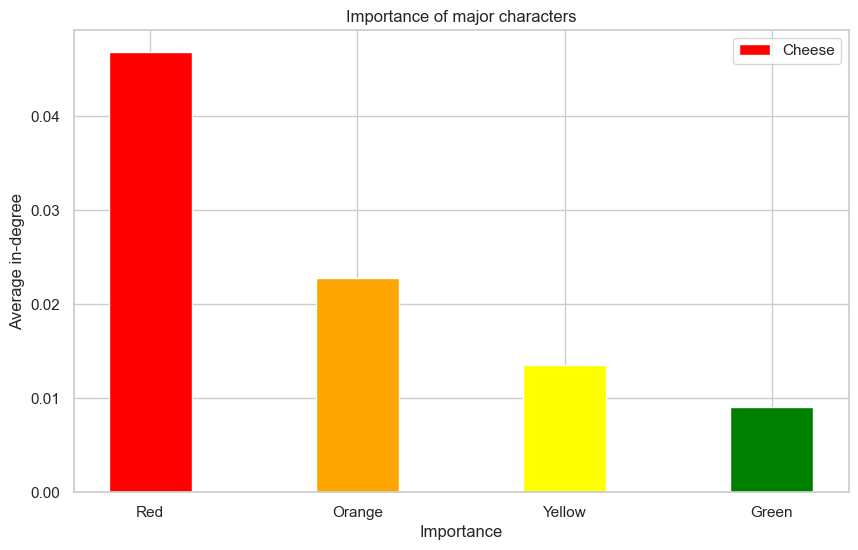

In [47]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Red','Orange','Yellow','Green']
average_in_degree = [np.mean([A[i][1] for i in red_indices]), 
                     np.mean([A[i][1] for i in orange_indices]),
                     np.mean([A[i][1] for i in yellow_indices]),
                     np.mean([A[i][1] for i in green_indices])]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis, average_in_degree, 0.4, label = 'Cheese', color=['Red', "Orange", "Yellow", "Green"])
  
plt.xticks(X_axis, X)
plt.xlabel("Importance")
plt.ylabel("Average in-degree")
plt.title("Importance of major characters")
plt.legend()
plt.show()

In [48]:
df_violin = pd.DataFrame(list(zip(B, C, D)),
               columns =['Name', 'Degree centrality', 'Importance'])
df_violin

,Name,Degree centrality,Importance
0,Thrall,0.118878,red
1,Sylvanas_Windrunner,0.107653,red
2,Jaina_Proudmoore,0.095408,red
3,Anduin_Wrynn,0.093367,orange
4,Garrosh_Hellscream,0.092347,red
...,...,...,...
267,Mogor,0.002551,yellow
268,Tortolla,0.002041,yellow
269,Baron_Revilgaz,0.002041,green
270,K'ara,0.002041,green


In [52]:
df_violin2 = pd.DataFrame(list(zip(B2, C2, D2)),
               columns =['Name', 'Betweenness centrality', 'Importance'])

In [53]:
# sns.set(rc={'figure.figsize':(10,6)})
# sns.set_theme(style="whitegrid")
# ax = sns.violinplot(x='Importance',y='Degree centrality',palette=['red','orange', 'yellow','green'],data=df_violin)

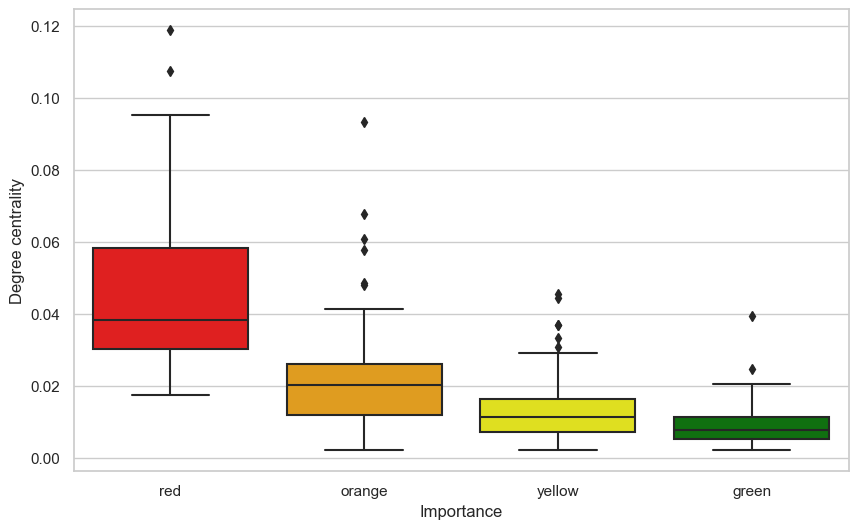

In [57]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='Importance',y='Degree centrality',palette=['red','orange', 'yellow','green'],data=df_violin)
plt.savefig("boxplot.png", dpi=600)

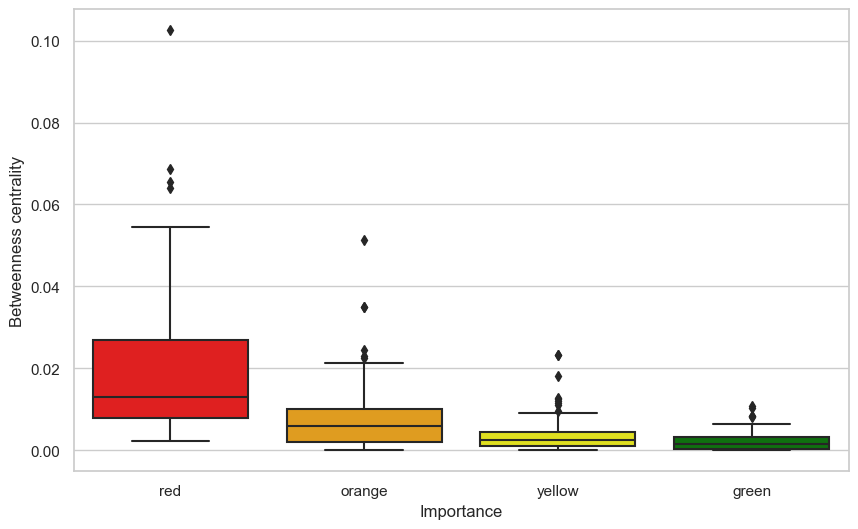

In [58]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='Importance',y='Betweenness centrality',palette=['red','orange', 'yellow','green'],data=df_violin2)
plt.savefig("boxplot2.png", dpi=600)

In [13]:
with open('df_importance.csv', 'wb') as handle:
    pickle.dump(df_violin, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
df_violin.to_csv('df_importance.csv', index=False)

In [14]:
import random
def config_model(Graph):
    new_edges = []
    copy_G = Graph.copy()
    edge_list = list(copy_G.edges())
    source_nodes = [edge[0] for edge in edge_list]
    target_nodes = [edge[1] for edge in edge_list]
    shuffle_nodes = source_nodes + target_nodes
    random.shuffle(shuffle_nodes)
    for i in range(int(len(shuffle_nodes)/2)):
        new_edges.append((shuffle_nodes[i*2],shuffle_nodes[i*2+1]))
    copy_G.remove_edges_from(list(copy_G.edges()))
    copy_G.add_edges_from(new_edges)
    return copy_G

In [15]:
def computeModularity(G, partition):
    #Here the partition input is an attribute that we will partition the data set by
    partitions = np.unique(list(nx.get_node_attributes(G,partition).values()))
    partition_dic = {part: [] for part in partitions}
    
    N = len(G.nodes())
    L = len(G.edges())
    
    modularity = 0
    #sort nodes into their respective communities
    for key in partition_dic.keys():
        for node in G.nodes():
            part = G.nodes[node][partition]
            partition_dic[part].append(node)
        community = nx.Graph.subgraph(G, partition_dic[key])
        k_c = sum([G.degree(v) for v in community])
        L_c = len(community.edges())

        #compuute modularity
        modularity += (L_c / L) - (k_c/(2*L))**2
        
    return modularity

In [16]:
random_G = config_model(G)
print("The configuration model network has {} edges, the original network has {} edges".format(len(random_G.edges),len(G.edges)))
print("The degree of the configuration model network is {}, the degree of the original network is {} ".format(sum(random_G.degree[node] for node in random_G.nodes),sum(G.degree[node] for node in G.nodes)))

The configuration model network has 9163 edges, the original network has 9648 edges
The degree of the configuration model network is 18326, the degree of the original network is 19296 


In [17]:
list(random_G.nodes()['Terokk'].keys())

['Race', 'Affiliation', 'Louvain', 'concatRace']

In [18]:
random_G_list = []
random_G_list2 = []
random_G_list3 = []
random_G_list4 = []
for k in range(1000):
    random_G_list.append(computeModularity(config_model(G),'Race'))
    random_G_list2.append(computeModularity(config_model(G),'Affiliation'))
    random_G_list3.append(computeModularity(config_model(G),'Louvain'))
    random_G_list4.append(computeModularity(config_model(G),'concatRace'))


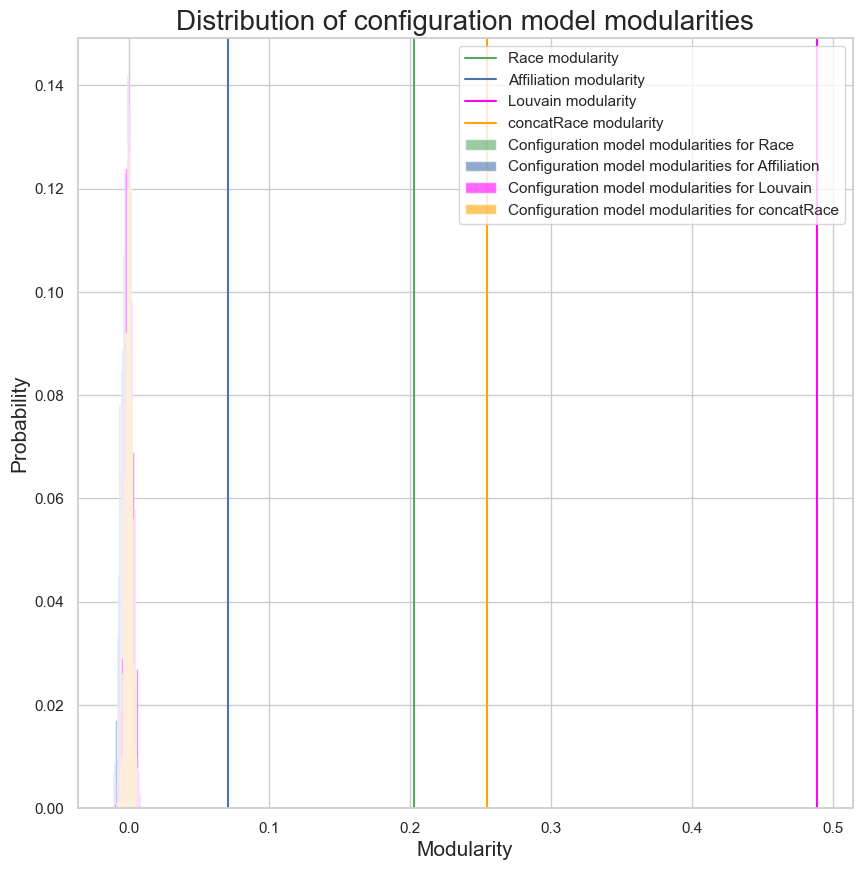

In [25]:
n_bins = 20

fig,ax = plt.subplots(figsize=(10,10))

G_lists = [random_G_list, random_G_list2, random_G_list3, random_G_list4]
colors = ['g', 'b', 'magenta', 'orange']
parts = list(random_G.nodes()['Terokk'].keys())


for i, l in enumerate(G_lists):

    bins = np.linspace(np.min(l), np.max(l), n_bins) # linear binning
    hist, edges = np.histogram(l, bins=bins, density=False)

    hist = hist / 1000

    # make midpoints and width
    x = (edges[1:] + edges[:-1]) / 2
    width = bins[1]-bins[0]

    # plot histogram and plot
    ax.grid()
    ax.bar(x, hist, width=width*0.9, color=colors[i], alpha=0.60, label = 'Configuration model modularities for {}'.format(parts[i]))
    plt.axvline(x=computeModularity(G, parts[i]), ymin=0, ymax=1, color = colors[i], label = '{} modularity'.format(parts[i]))
   
# plt.axvline(x=computeModularity(G,'Affiliation'), ymin=0, ymax=1, color = 'g', label = 'Affiliation modularity')
# plt.axvline(x=computeModularity(G,'Race'), ymin=0, ymax=1, color = 'orange', label = 'Race modularity')
ax.set_xlabel("Modularity", size=15)
ax.set_ylabel("Probability", size=15)
ax.set_title('Distribution of configuration model modularities', size=20)
ax.legend();
plt.savefig("permutation.png", dpi=600)
plt.show()